In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

# Funcation

(1,2)(2,1)(4,4)(5,3)

In [46]:
x=[1,2,4,5]
y=[2,1,4,3]
xDelta = np.array(x[1:])-np.array(x[:-1])   #δ
yDelta = np.array(y[1:])-np.array(y[:-1])   #Δ
aMatrix=np.eye(len(x))
bMatrix=np.zeros_like(x)

for i in range(1,len(x)-1):
    aMatrix[i][i-1]=xDelta[i-1]
    aMatrix[i][i]=2*(xDelta[i-1]+xDelta[i])
    aMatrix[i][i+1]=xDelta[i]
    bMatrix[i]=3*(yDelta[i]/xDelta[i]-yDelta[i-1]/xDelta[i-1])

cCoefficient = np.linalg.solve(aMatrix,bMatrix)
dCoefficient = (cCoefficient[1:]-cCoefficient[:-1])/(3*xDelta)
bCoefficient = yDelta/xDelta - xDelta*(2*cCoefficient[:-1]+cCoefficient[1:])/3
aCoefficient = y[:-1]

def cubicF(xVar):
    xTemp=x.copy()
    xTemp.append(xVar)
    xTemp.sort(reverse=True)
    temp = len(x)-1-xTemp.index(xVar)    #索引位置
    return aCoefficient[temp]+bCoefficient[temp]*(xVar-x[temp])+cCoefficient[temp]*(xVar-x[temp])**2+dCoefficient[temp]*(xVar-x[temp])**3


# Figure

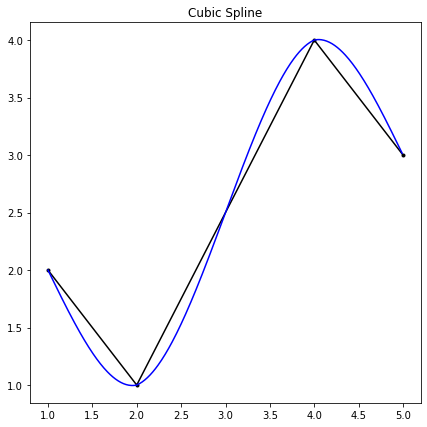

In [51]:
fig = plt.figure(figsize=(7,7))
xData=np.arange(1,5,0.01)
yCubic=[cubicF(i) for i in xData]
plt.plot(x,y,'.-k',label='line')
plt.plot(xData,yCubic,'b',label='Cubic Spline')
plt.title('Cubic Spline')
plt.savefig('CubicSpline.jpeg',dpi=200)